In [1]:
import networkx
from community import community_louvain
from networkx.algorithms import community
from networkx.algorithms.community.quality import modularity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "Monaco"
cm = plt.cm.bone

DATA = 'data/dolphins/soc-dolphins.mtx'
Graph = networkx.read_weighted_edgelist(DATA, comments='%', nodetype=int)

In [3]:
def printStatistics(Graph):
    number_of_nodes = Graph.number_of_nodes()
    number_of_edges = Graph.number_of_edges()
    density = round(networkx.density(Graph), 4)

    min_degree = min(dict(Graph.degree()).values())
    max_degree = max(dict(Graph.degree()).values())
    avg_degree = round(sum(dict(Graph.degree()).values()) / number_of_nodes, 4)

    number_of_triangles = sum(networkx.triangles(Graph).values()) // 3
    avg_number_of_triangles = round(
        number_of_triangles / Graph.number_of_nodes(), 4)

    clustering_coefficient = round(networkx.average_clustering(Graph), 4)
    diameter = networkx.diameter(Graph)

    print("-----------------------------------")
    print("Some statistics about the dataset")
    print("-----------------------------------")
    print("Number of nodes:", number_of_nodes)
    print("Number of edges:", number_of_edges)
    print("Density:", density)
    print("-----------------------------------")
    print("Minimum degree:", min_degree)
    print("Maximum degree:", max_degree)
    print("Average degree:", avg_degree)
    print("-----------------------------------")
    print("Number of triangles:", number_of_triangles)
    print("Average number of triangles:", avg_number_of_triangles)
    print("-----------------------------------")
    print("Clustering coefficient:", clustering_coefficient)
    print("Diameter:", diameter)
    print("-----------------------------------")

printStatistics(Graph)

-----------------------------------
Some statistics about the dataset
-----------------------------------
Number of nodes: 62
Number of edges: 159
Density: 0.0841
-----------------------------------
Minimum degree: 1
Maximum degree: 12
Average degree: 5.129
-----------------------------------
Number of triangles: 95
Average number of triangles: 1.5323
-----------------------------------
Clustering coefficient: 0.259
Diameter: 8
-----------------------------------


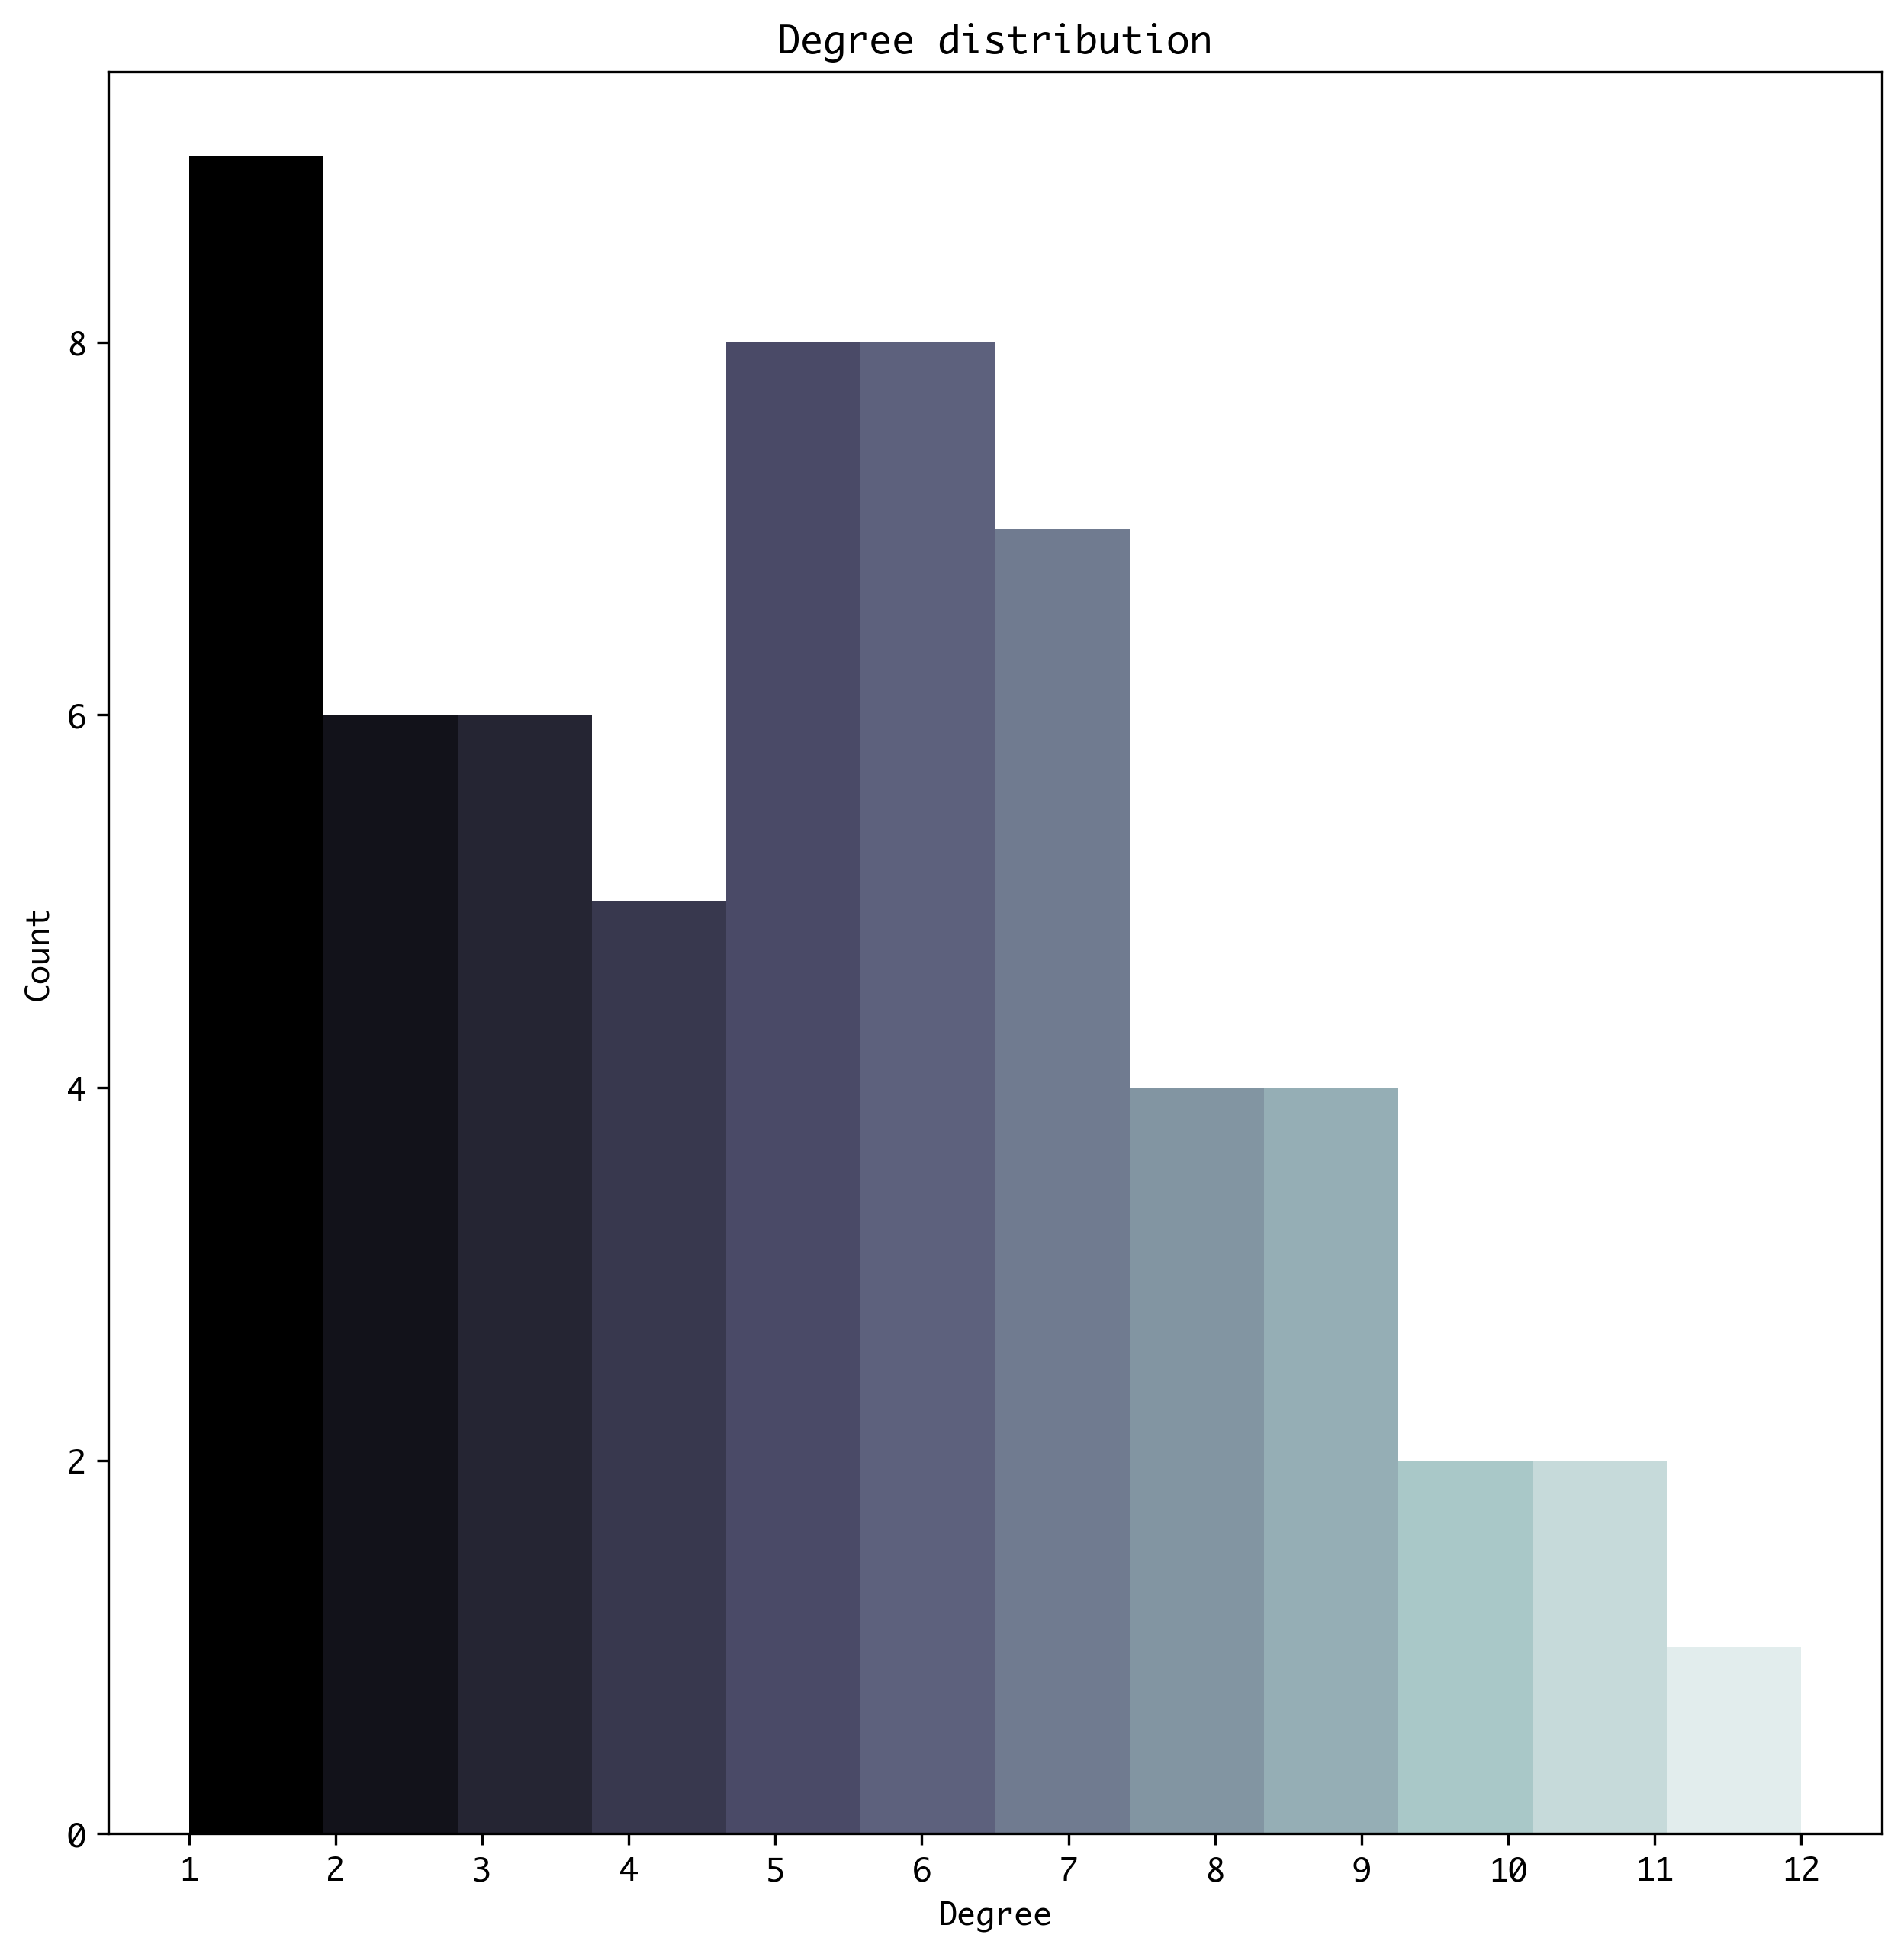

In [4]:
def plotDegreeDistribution(Graph):
    degrees = dict(Graph.degree())
    min_degree = min(dict(Graph.degree()).values())
    max_degree = max(dict(Graph.degree()).values())
    
    plt.figure(figsize=(10, 10), dpi = 300)
    _, _, patches = plt.hist(degrees.values(), 12)
    for i, p in enumerate(patches):
        plt.setp(p, 'facecolor', cm(i / 12))
    plt.xlabel('Degree')
    plt.xticks(np.arange(min_degree, max_degree + 1, 1))
    plt.ylabel('Count')
    plt.title('Degree distribution')
    plt.savefig('result/degree_distribution.png', transparent=True)
    plt.show()

plotDegreeDistribution(Graph)

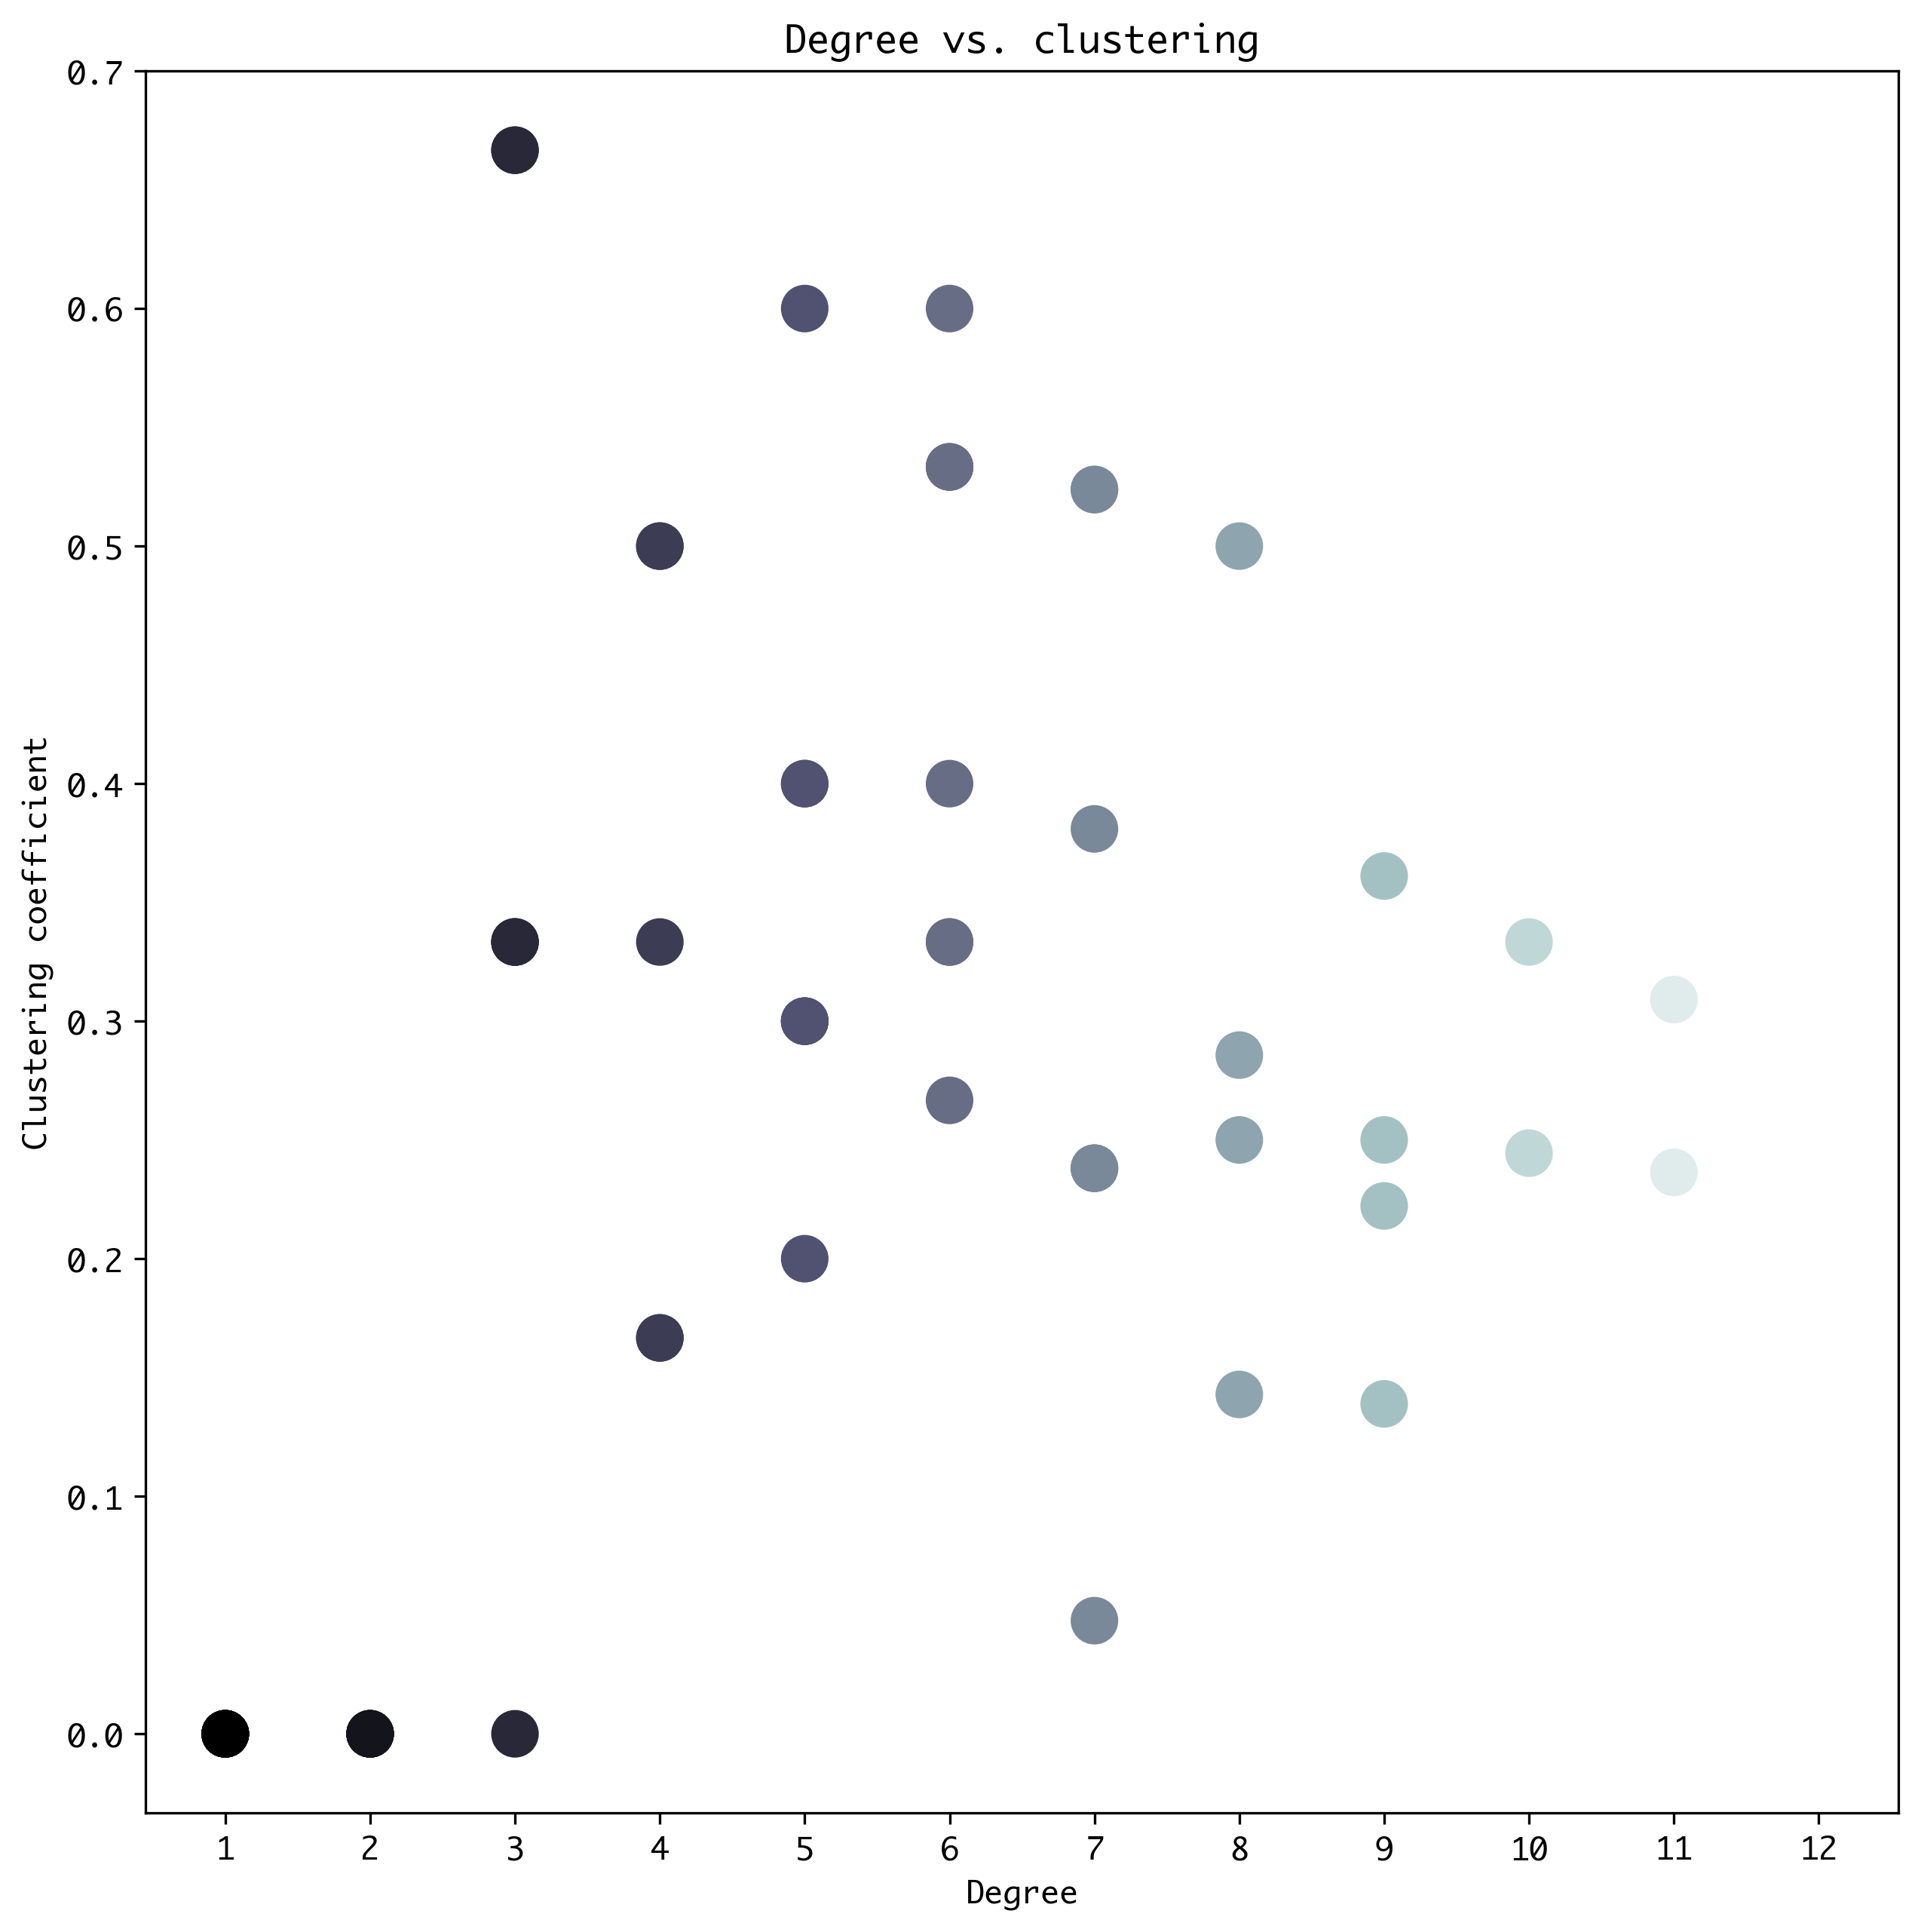

In [5]:
def plotDegreeVsClustering(Graph):
    degrees = dict(Graph.degree())
    min_degree = min(dict(Graph.degree()).values())
    max_degree = max(dict(Graph.degree()).values())
    clustering = networkx.clustering(Graph)

    plt.figure(figsize=(10, 10), dpi = 300)
    plt.scatter(x=list(degrees.values()), y=list(clustering.values()), s=200, c=list(degrees.values()), cmap=cm)
    plt.xticks(np.arange(min_degree, max_degree + 1, 1))
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.title("Degree vs. clustering")
    plt.savefig('result/degree_vs_clustering.png', transparent=True)
    plt.show()

plotDegreeVsClustering(Graph)


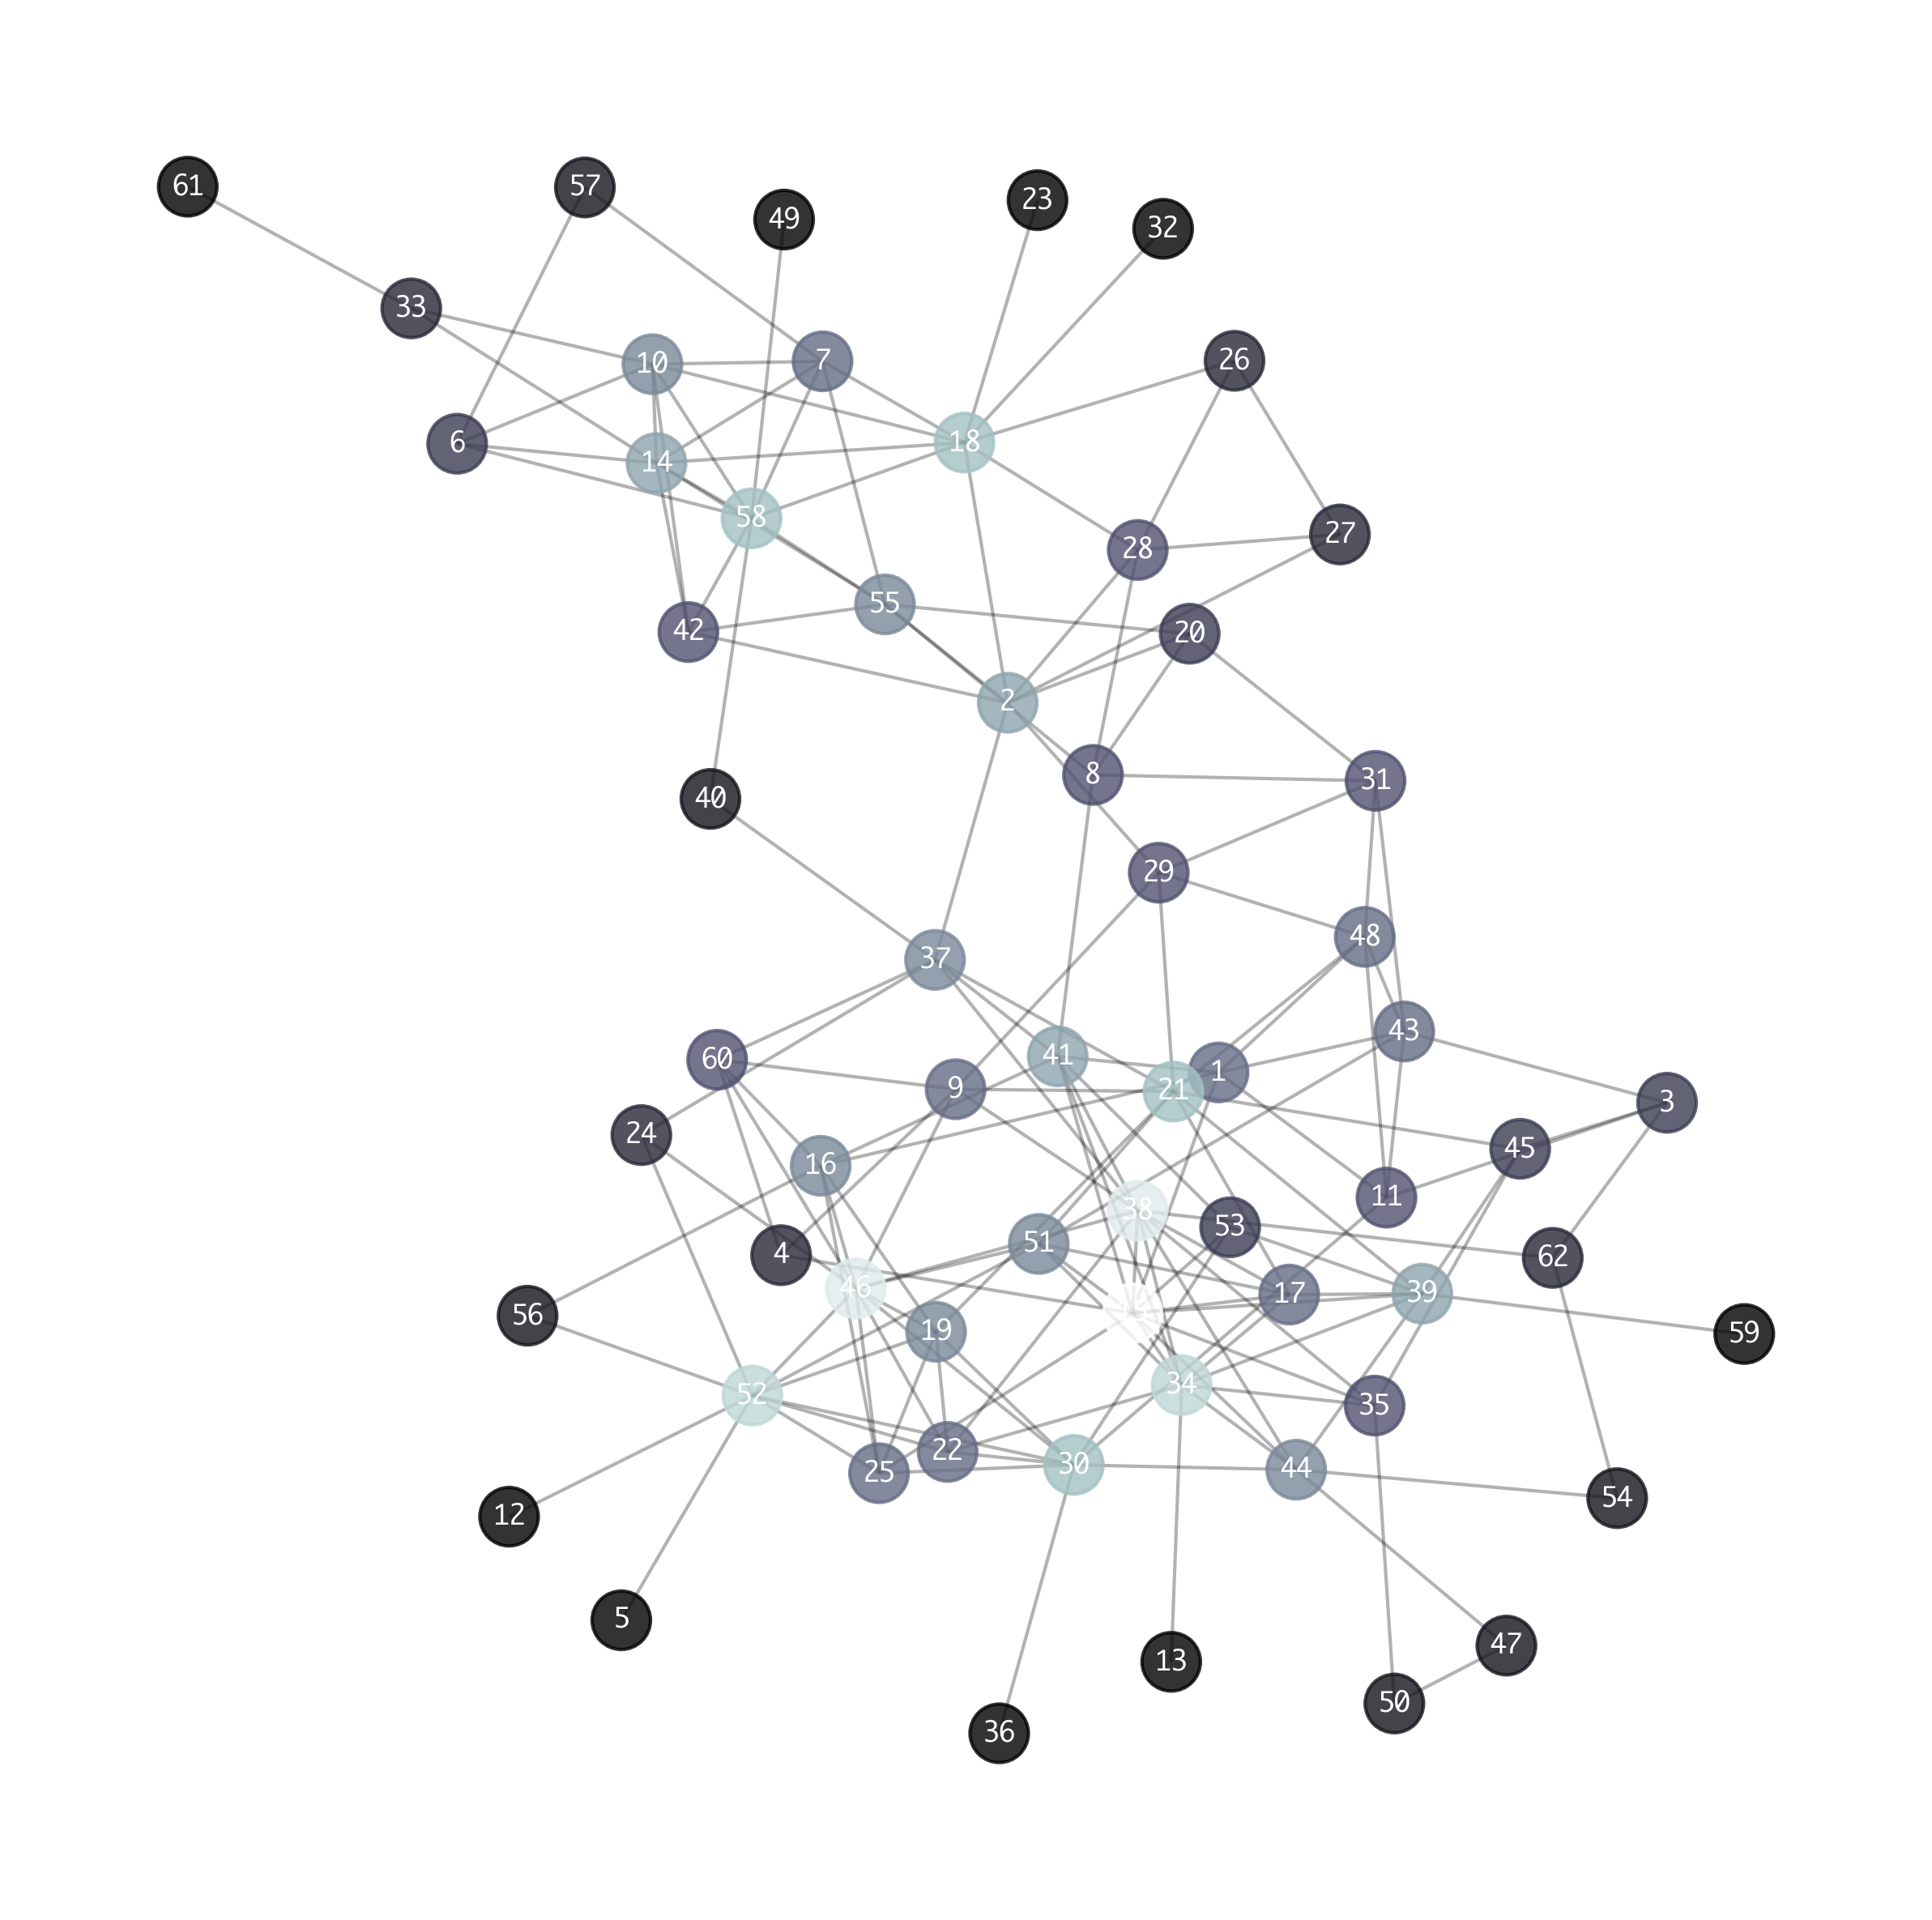

In [6]:
def plot(Graph):
    degrees = dict(Graph.degree())
    
    plt.figure(figsize=(10, 10), dpi = 300)
    pos = networkx.kamada_kawai_layout(Graph)
    networkx.draw_networkx_nodes(Graph, pos, alpha=0.8, node_color=list(degrees.values()), cmap='bone')
    networkx.draw_networkx_edges(Graph, pos, width=1.0, alpha=0.3)
    labels = {node: node for node in Graph.nodes()}
    networkx.draw_networkx_labels(Graph, pos, labels, font_size=8, font_color='white', font_family='Monaco')
    plt.axis('off')
    plt.savefig('result/graph.png', transparent=True)
    plt.show()

plot(Graph)

/var/folders/ff/r4b5612d6pj693ck9ldzc96w0000gn/T/ipykernel_6634/924073645.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(A, method='ward')


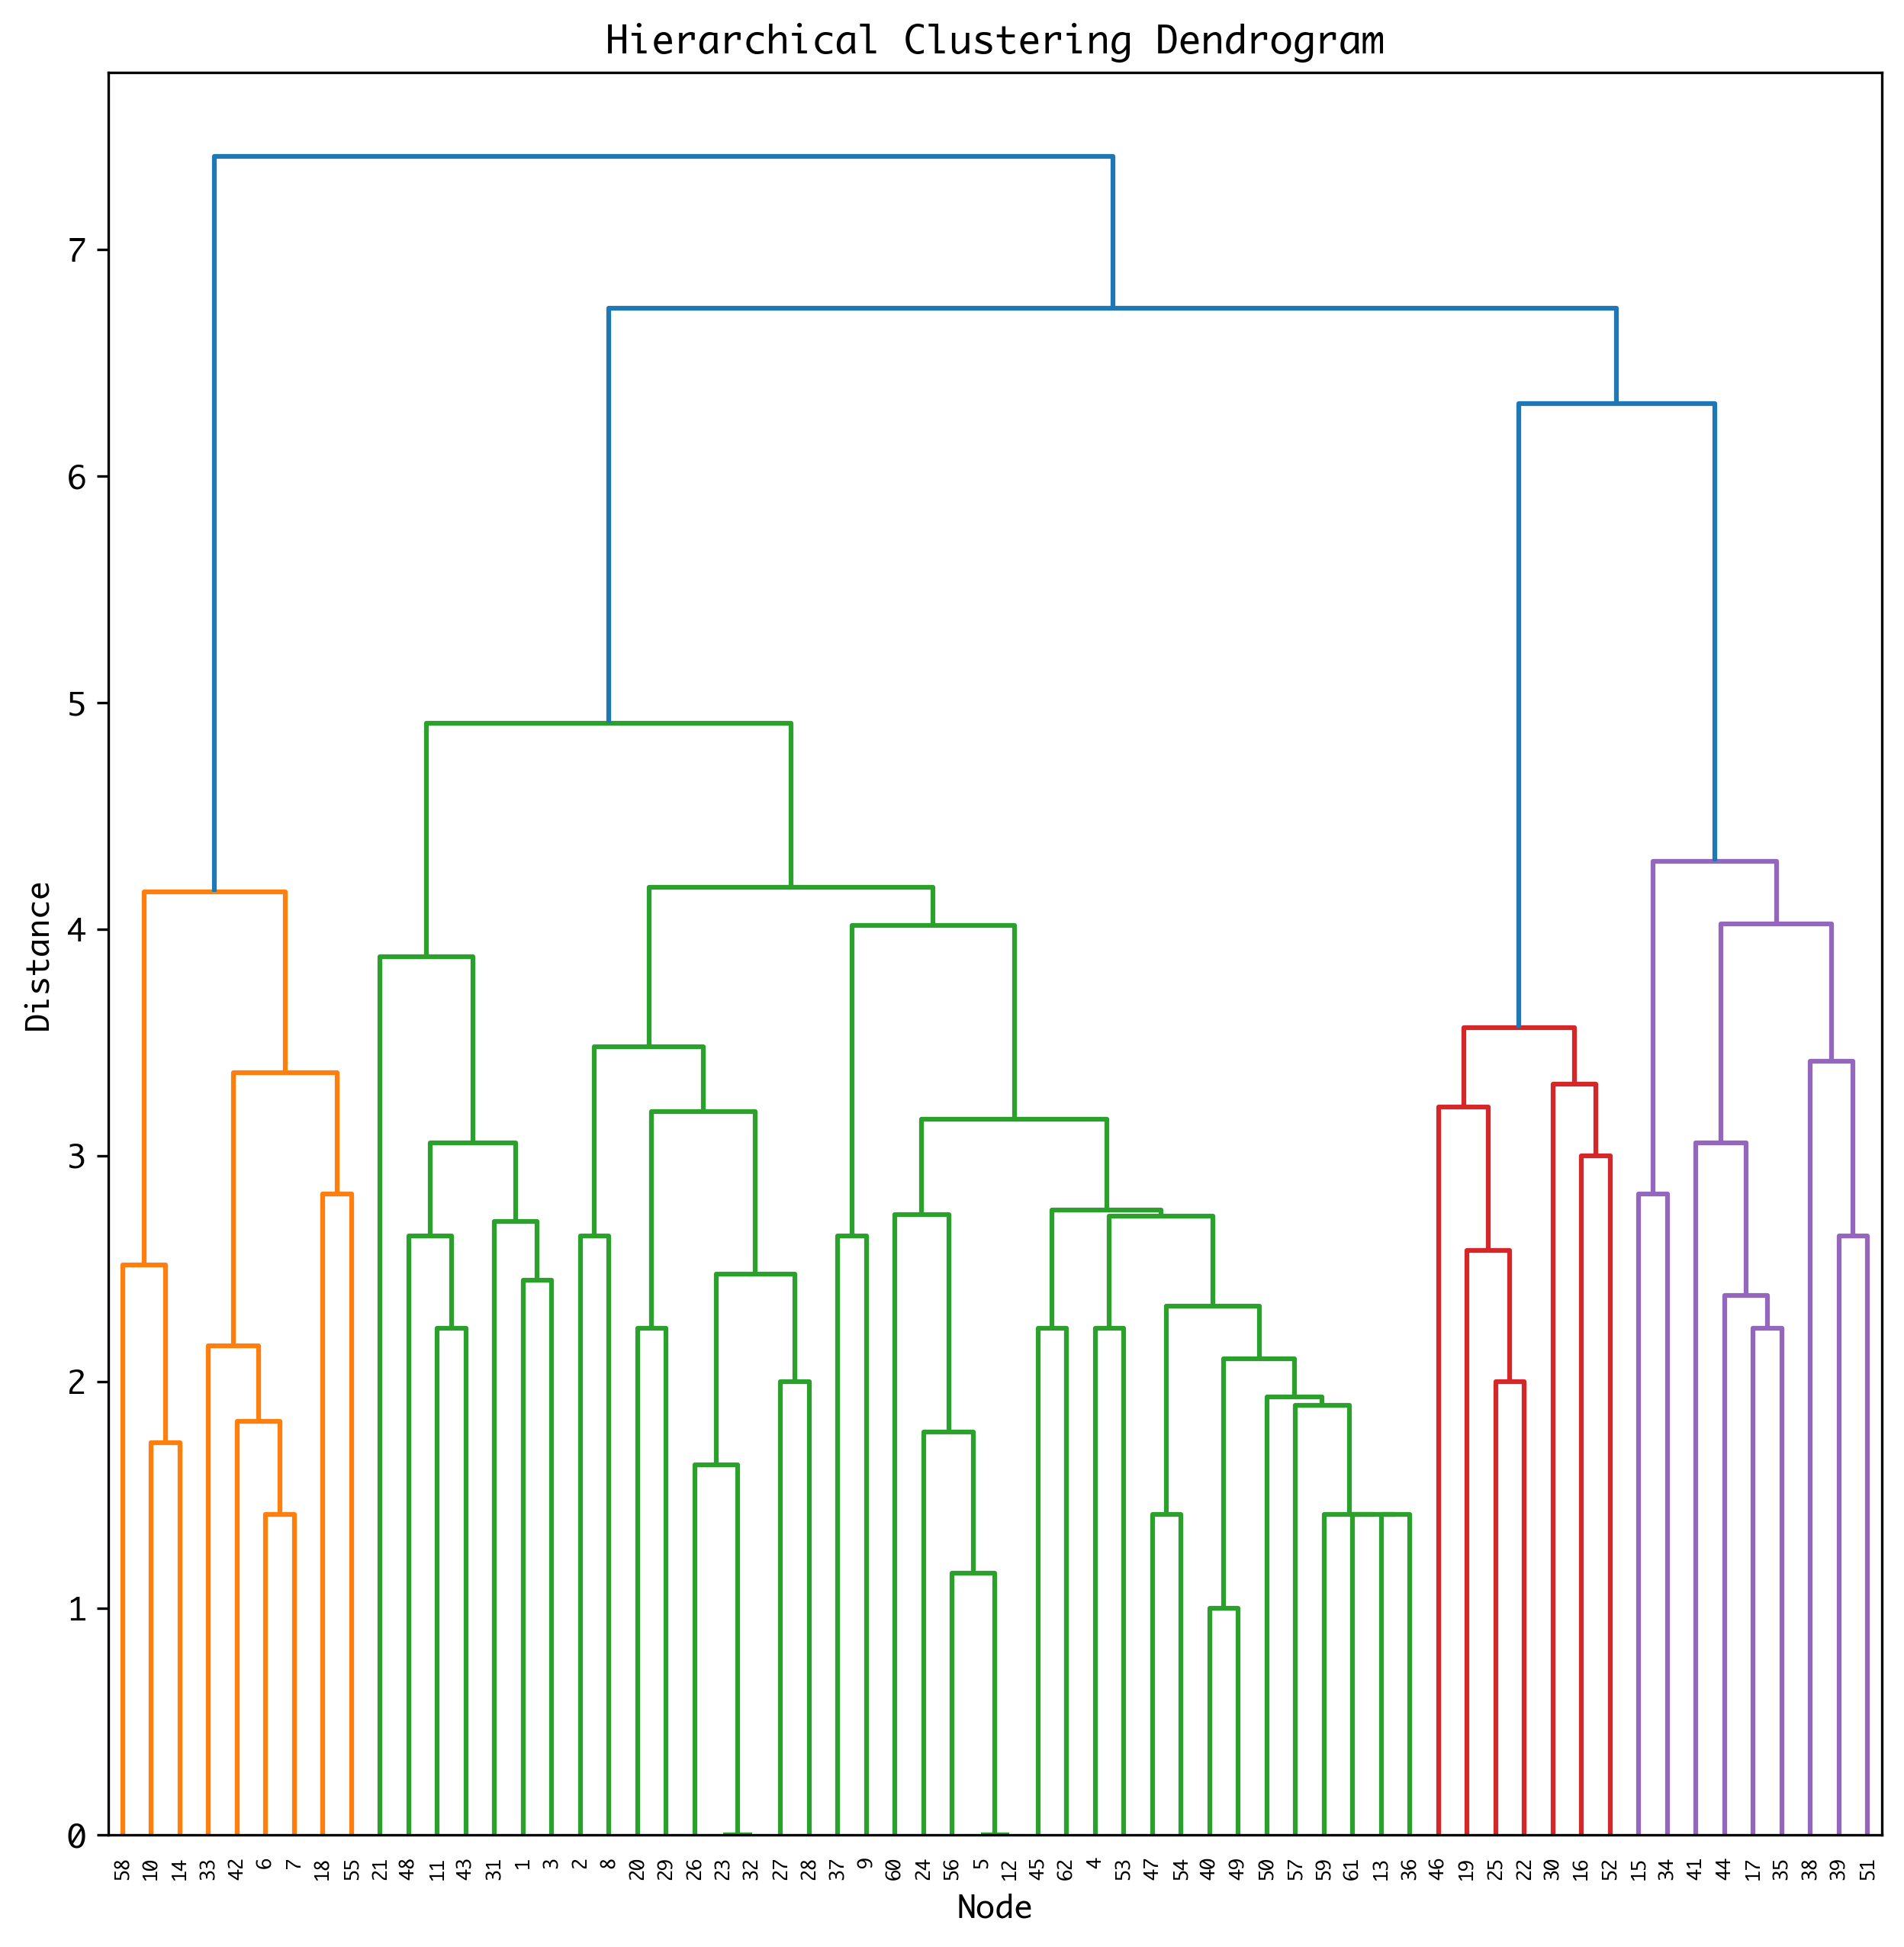

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Convert the graph to a numpy array
A = networkx.to_numpy_array(Graph)

# Compute the linkage matrix
Z = linkage(A, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 10), dpi = 300)
dendrogram(Z, labels=list(Graph.nodes()), orientation='top')
plt.xlabel('Node')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.savefig('result/dendrogram.png', transparent=True)
plt.show()


Modularity: 0.3787033740753925


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


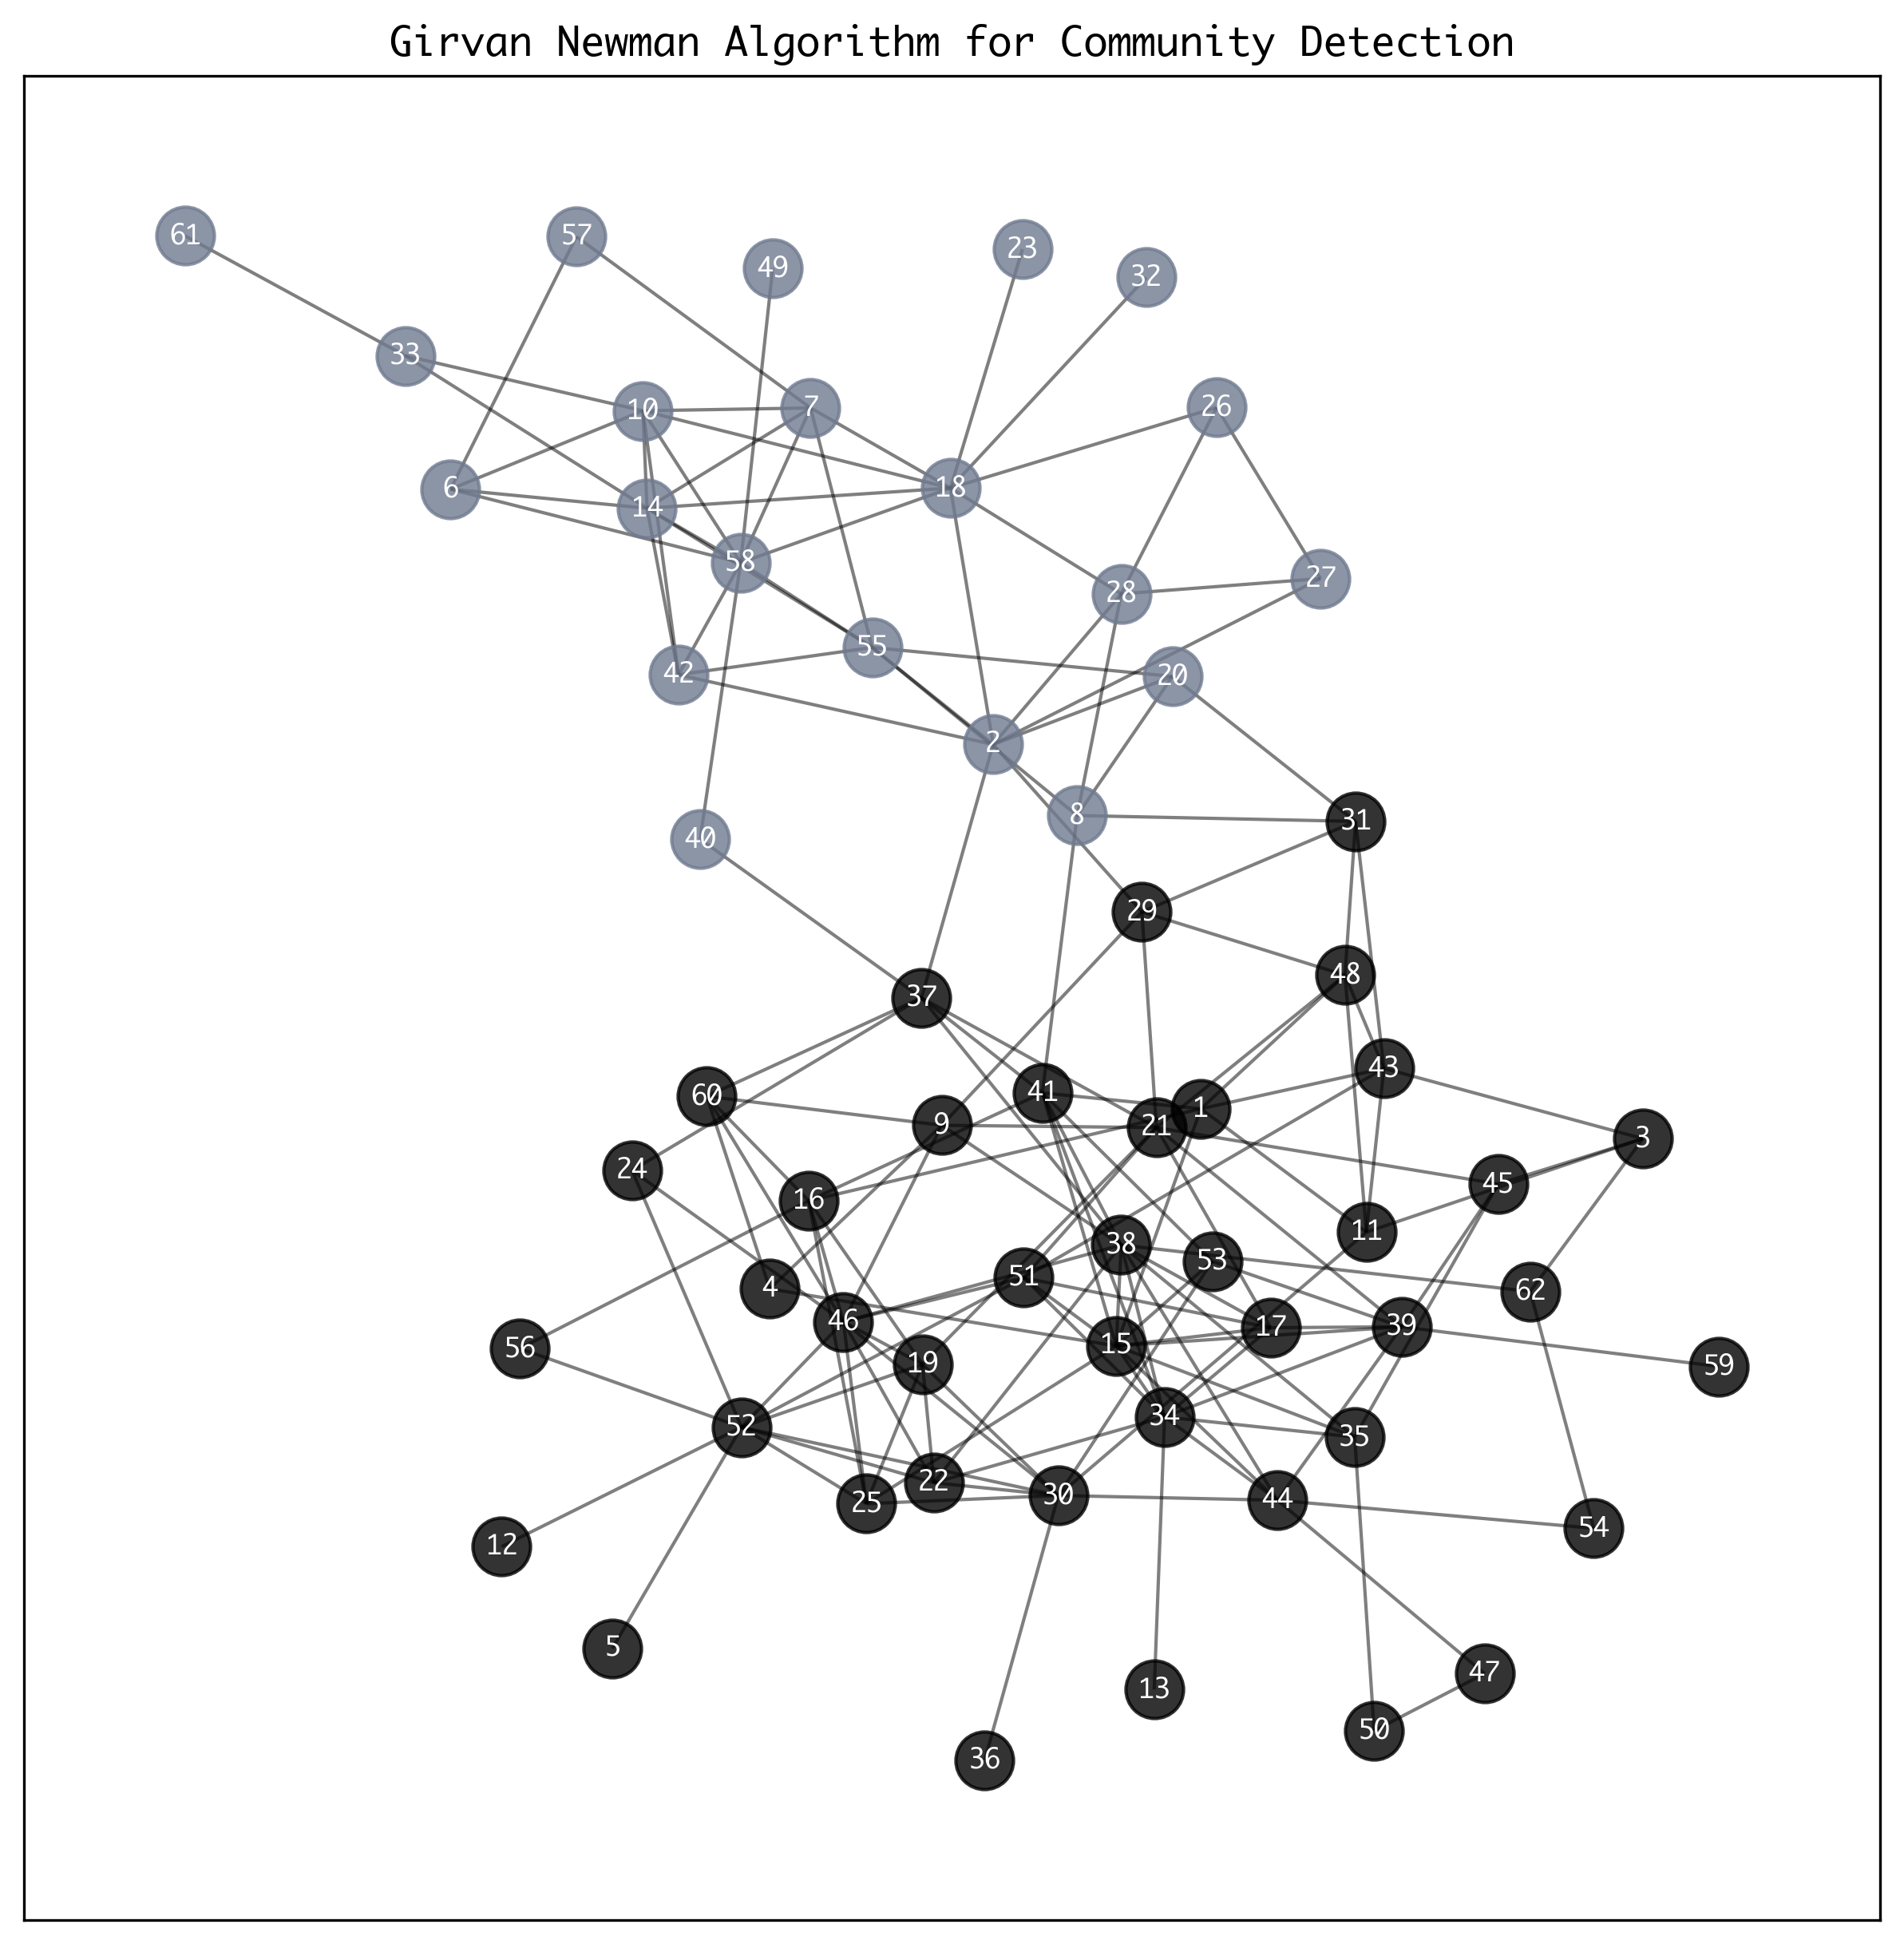

In [8]:
def GirvanNewman(Graph):
    comp = community.girvan_newman(Graph)
    top_level_comm = tuple(sorted(c) for c in next(comp))
    print('Modularity:', modularity(Graph, top_level_comm))

    plt.figure(figsize=(10, 10), dpi=300)
    pos = networkx.kamada_kawai_layout(Graph)
    for i, comm in enumerate(top_level_comm):
        color = cm(i / len(top_level_comm))
        networkx.draw_networkx_nodes(Graph, pos, alpha=0.8, nodelist=comm, node_color=color)
    networkx.draw_networkx_edges(Graph, pos, alpha=0.5)
    labels = {node: node for node in Graph.nodes()}
    networkx.draw_networkx_labels(Graph, pos, labels, font_size=8, font_color='white', font_family='Monaco')
    plt.title("Girvan Newman Algorithm for Community Detection")
    plt.savefig('result/girvan_newman.png', transparent=True)
    plt.show()

    return top_level_comm

GN = GirvanNewman(Graph)

Modularity: 0.5233376844270401


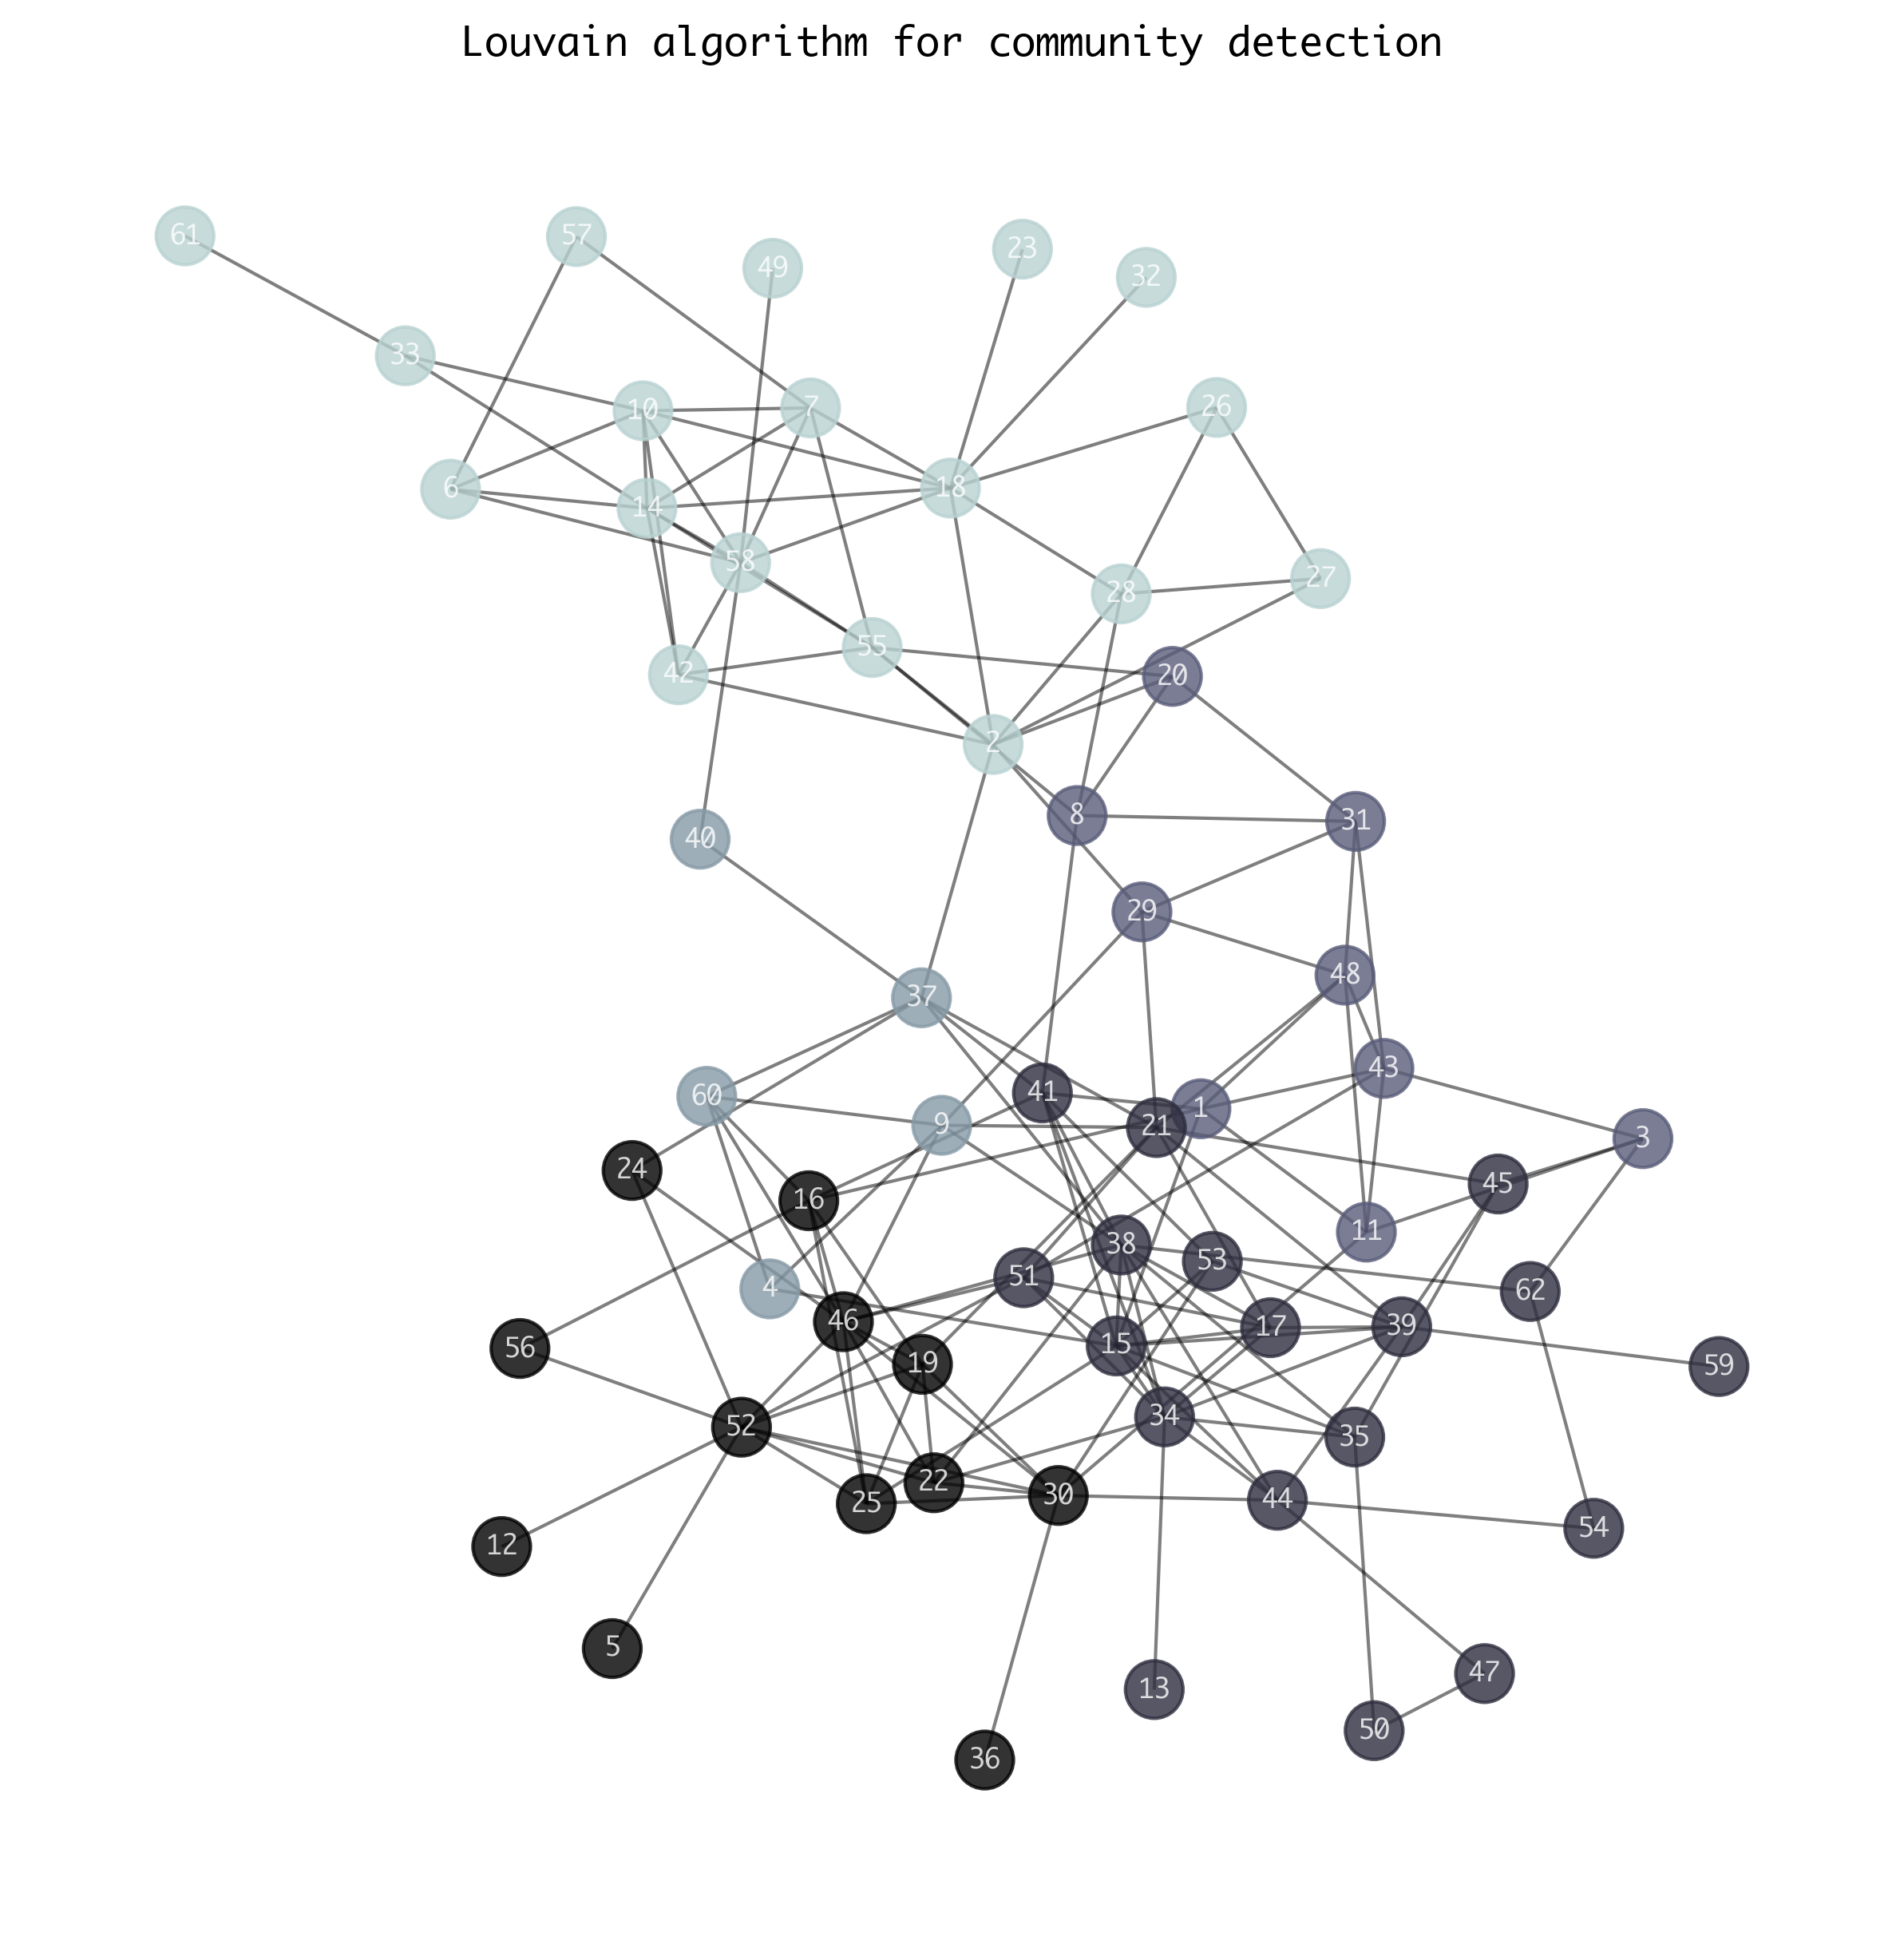

In [9]:
def Louvain(Graph):
    partition = community_louvain.best_partition(Graph)
    communities = tuple(list() for i in range(max(partition.values()) + 1))
    for node, community in partition.items():
        communities[community].append(node)
    
    print('Modularity:', modularity(Graph, communities))
    node_colors = [cm(partition[n] / len(communities)) for n in Graph.nodes()]

    plt.figure(figsize=(10, 10), dpi = 300)
    pos = networkx.kamada_kawai_layout(Graph)
    networkx.draw_networkx_nodes(Graph, pos, node_color=node_colors, alpha=0.8)
    networkx.draw_networkx_edges(Graph, pos, alpha=0.5)
    labels = {node: node for node in Graph.nodes()}
    networkx.draw_networkx_labels(Graph, pos, labels, font_size=8, font_color='white', font_family='Monaco', alpha=.8)

    plt.title("Louvain algorithm for community detection")
    plt.axis('off')
    plt.savefig('result/louvain.png', transparent=True)
    plt.show()
    return communities

LV = Louvain(Graph)


In [10]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def compareCommunities(communities1, communities2):
    print(communities1)
    print(communities2)
    print("Adjusted Rand Index:", adjusted_rand_score(communities1, communities2))
    print("Normalized Mutual Information:", normalized_mutual_info_score(communities1, communities2))

In [11]:
def transform_array(communities, index):
    transformed_array = []
    max_value = 62
    
    for i in range(1, max_value + 1):
        if i in communities[index]:
            transformed_array.append(i)
        else:
            transformed_array.append(0)
    
    return transformed_array



In [12]:
print('Number of partitions by using Louvain: ' + str(len(LV)))
print('Number of partitions by using Girvan Newman: ' + str(len(GN)))

Number of partitions by using Louvain: 5
Number of partitions by using Girvan Newman: 2


In [13]:
import pandas as pd

similarity_matrix = pd.DataFrame(columns=["LV-" + str(i) for i in range(len(LV))],
                                 index=["GN-" + str(i) + "   " for i in range(len(GN))])

for i, community1 in enumerate(LV):
    for j, community2 in enumerate(GN):
        community1  = transform_array(LV, i)
        community2 = transform_array(GN, j)
        similarity_matrix.iloc[j, i] = adjusted_rand_score(community1, community2)

print(similarity_matrix)

             LV-0      LV-1      LV-2      LV-3      LV-4
GN-0     0.127198  0.221896  0.028035  0.017582 -0.215788
GN-1    -0.254835 -0.332535 -0.072881 -0.050547  0.866747


In [14]:
def plot_highlighted_community(Graph, community):
    node_colors = []
    for node in Graph.nodes():
        if node in community:
            # Highlight the community with gray color
            color = 'orange'
        else:
            # Mark other nodes with light gray color
            color = 'lightgray'
        node_colors.append(color)

    plt.figure(figsize=(10, 10), dpi=300)
    pos = networkx.kamada_kawai_layout(Graph)
    networkx.draw_networkx_nodes(Graph, pos, node_color=node_colors, alpha=0.8)
    networkx.draw_networkx_edges(Graph, pos, alpha=0.5)
    labels = {node: node for node in Graph.nodes()}
    networkx.draw_networkx_labels(Graph, pos, labels, font_size=8, font_color='white', font_family='Monaco', alpha=0.8)

    plt.title("Community Detection with Highlighted Community")


In [15]:
def plot_highlighted_community(Graph, community1, community2):
    fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=300)
    pos = networkx.kamada_kawai_layout(Graph)
    labels = {node: node for node in Graph.nodes()}

    axs[0].set_title("Louvain Algorithm")
    node_colors1 = ['purple' if node in community1 else 'lightgray' for node in Graph.nodes()]
    networkx.draw_networkx_nodes(Graph, pos, node_color=node_colors1, alpha=0.8, ax=axs[0])
    networkx.draw_networkx_edges(Graph, pos, alpha=0.5, ax=axs[0])
    networkx.draw_networkx_labels(Graph, pos, labels, font_size=8, font_color='white', font_family='Monaco', alpha=0.8, ax=axs[0])
    axs[0].axis('off')

    axs[1].set_title("Girvan Newman Algorithm")
    node_colors2 = ['purple' if node in community2 else 'lightgray' for node in Graph.nodes()]
    networkx.draw_networkx_nodes(Graph, pos, node_color=node_colors2, alpha=0.8, ax=axs[1])
    networkx.draw_networkx_edges(Graph, pos, alpha=0.5, ax=axs[1])
    networkx.draw_networkx_labels(Graph, pos, labels, font_size=8, font_color='white', font_family='Monaco', alpha=0.8, ax=axs[1])
    axs[1].axis('off')

    plt.suptitle("Results comparison between Louvain and Girvan Newman approaches")
    plt.savefig('result/comparison.png', transparent=True)
    plt.show()

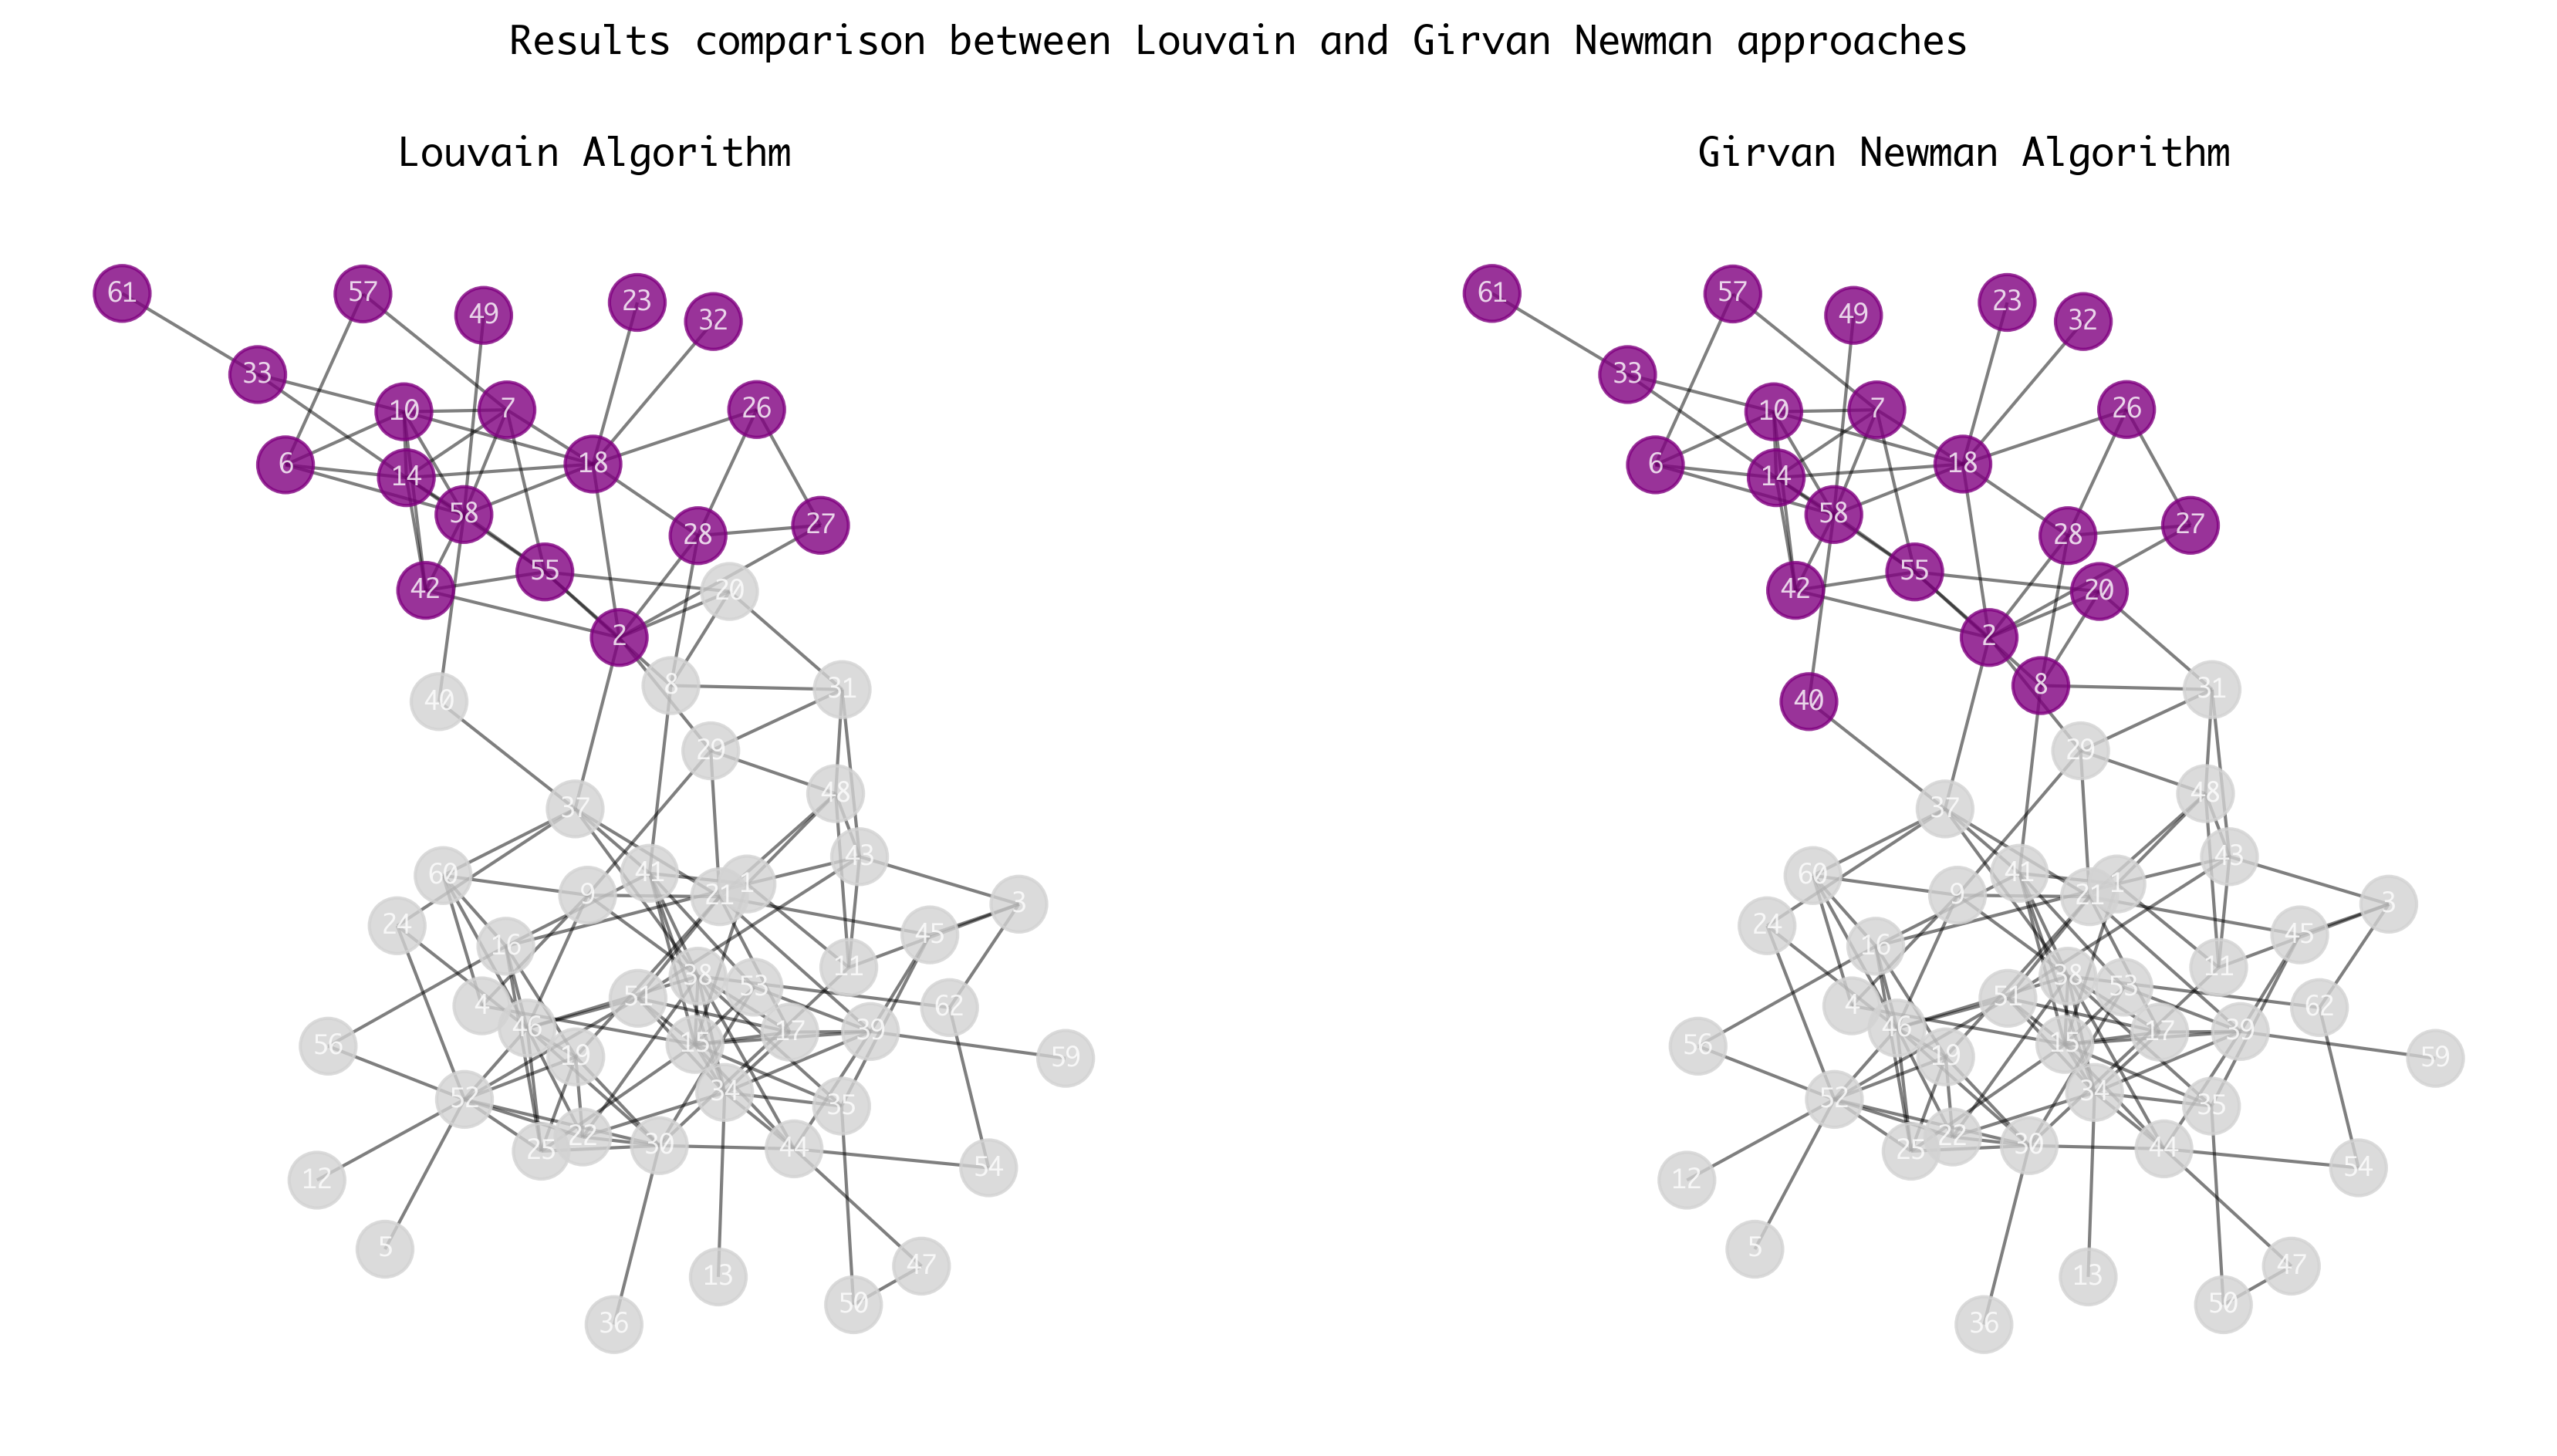

In [17]:
plot_highlighted_community(Graph, LV[4], GN[1])